# Fractal Dimension Calculator

In [53]:
# Import libraries

import numpy as np
import pandas as pd
import cv2 as cv 
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

### Load in the Image and convert to Grayscale

We want to convert the image into grayscale to calculate the fractal dimension. When using box counting, it only cares whether the fractal is "in" the box or "not", meaning that color isn't important. A black and white image is suffice.

In [54]:
# Fetch image

url = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.galleryintell.com%2Fwp-content%2Fuploads%2F2013%2F03%2Fautumn_rhythm-pollock1.jpg&f=1&nofb=1&ipt=0dacbb7caed66a73a9cb62a6a6d083fce98ca424f1ab566c301687d8467d6762&ipo=images"

im = io.imread(url)

# Convert image to grayscale

img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
img_bw = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
img_bw_3chn = cv.cvtColor(img_bw, cv.COLOR_GRAY2BGR)

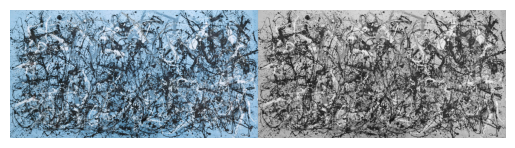

In [55]:
# Combine images for visual

final_frame = cv.hconcat((img, img_bw_3chn))
plt.axis('off')
plt.imshow(final_frame)

### Crop Image to 1024x1024

We need to standardize the image that we will be performing the calculation on. We want to use a square so we can evenly scale down the boxes when doing box counting. We also want to have each square crop from an image to be the same size so that there will be an equal amount of scales per photo.

We choose to make the height and width 1024 because it is a power of 2 which makes scaling down uniform.

In [56]:
# Print dimension and shape of black and white image array

print(img_bw.ndim)
print(img_bw.shape)

2
(1602, 3102)


In [57]:
# Images must be at least 1024x1024

height, width = img_bw.shape
fin_img = img_bw[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]

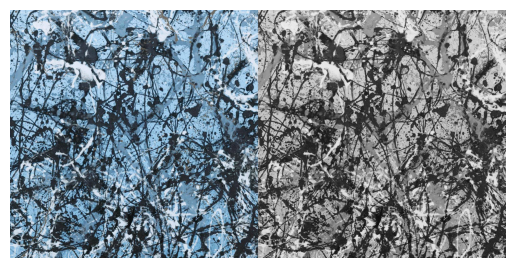

In [58]:
# Show images

color_crop = img[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]
bw_crop = img_bw_3chn[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]
final_frame = cv.hconcat((color_crop, bw_crop))
plt.axis('off')
plt.imshow(final_frame)

### Threshold image (convert to binary array)

We have to make a desicion on how we decide to threshold the image. The thresh between what becomes white or black will greatly effect the outcome of calculating the fractal dimension

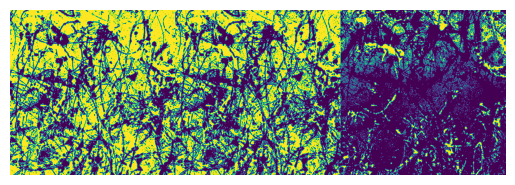

In [59]:
# Threshold Image

ret,thresh1 = cv.threshold(fin_img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(fin_img,127,255,cv.THRESH_BINARY)
ret,thresh3 = cv.threshold(fin_img,200,255,cv.THRESH_BINARY)
final_frame = cv.hconcat((thresh1, thresh2, thresh3))
plt.axis('off')
plt.imshow(final_frame)

We will figure out the average value of the image and let that be the threshold.

In [60]:
# Print average pixel value

avg = np.mean(fin_img)
print(avg)

122.65687942504883


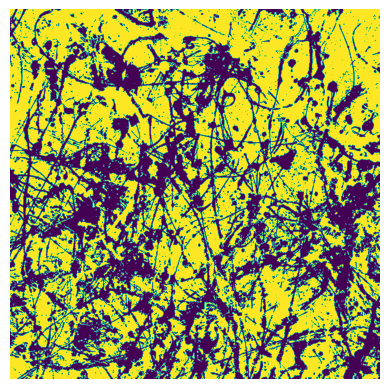

In [61]:
# Make and print finished image

ret,fin_thresh = cv.threshold(fin_img,100,255,cv.THRESH_BINARY)
plt.axis('off')
plt.imshow(fin_thresh)

### Calculating the Fractal Dimension

In [62]:
# Print information of iterations

for i in range (9, -1, -1):
  print(f'Scaling Factor: {1024//2**i}')
  print(f'Box Size (in pixels): {2**i}x{2**i}')
  print(f'Number of Boxes: {(1024//2**i)**2}\n')

Scaling Factor: 2
Box Size (in pixels): 512x512
Number of Boxes: 4

Scaling Factor: 4
Box Size (in pixels): 256x256
Number of Boxes: 16

Scaling Factor: 8
Box Size (in pixels): 128x128
Number of Boxes: 64

Scaling Factor: 16
Box Size (in pixels): 64x64
Number of Boxes: 256

Scaling Factor: 32
Box Size (in pixels): 32x32
Number of Boxes: 1024

Scaling Factor: 64
Box Size (in pixels): 16x16
Number of Boxes: 4096

Scaling Factor: 128
Box Size (in pixels): 8x8
Number of Boxes: 16384

Scaling Factor: 256
Box Size (in pixels): 4x4
Number of Boxes: 65536

Scaling Factor: 512
Box Size (in pixels): 2x2
Number of Boxes: 262144

Scaling Factor: 1024
Box Size (in pixels): 1x1
Number of Boxes: 1048576



In [63]:
# Initialize array

sArr = np.array([])
nArr = np.array([])

for i in range(9, -1, -1):
  print(f'Iteration {10-i}')
  scalingFactor = 1024//2**i
  boxSize = 2**i
  numberOfBoxes = (1024//2**i)**2
  n = 0

  # iterate through each box
  for row in range(scalingFactor):
    for col in range(scalingFactor):
      # iterate through each pixel in a box
      found = False 
      for x in range(row*boxSize, (row+1)*boxSize):
        for y in range(col*boxSize, (col+1)*boxSize):
          if fin_thresh[x][y] == 0:
            found = True
            n += 1
            break
        if found:
          break
  sArr = np.append(sArr, scalingFactor)
  nArr = np.append(nArr, n)

# Prints values of scaling factor and n
print(sArr)
print(nArr)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
[4.00000e+00 1.60000e+01 6.40000e+01 2.56000e+02 1.02300e+03 3.92200e+03
 1.34510e+04 4.21510e+04 1.29966e+05 4.27023e+05]


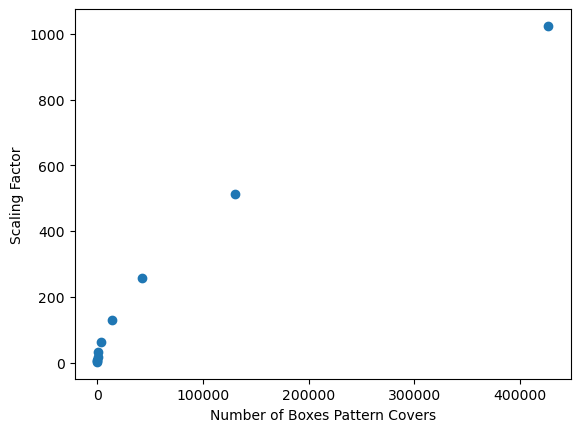

In [64]:
# Plot n and scaling factor

plt.plot(nArr, sArr, 'o')
plt.xlabel('Number of Boxes Pattern Covers')
plt.ylabel('Scaling Factor')
plt.show()

## Regression

In [65]:
# Importing new library

from sklearn.linear_model import LinearRegression

In [66]:
# Fitting Linear Regression

lin_reg = LinearRegression()
x = sArr.reshape(-1, 1)
y = nArr.reshape(-1, 1)
lin_reg.fit(x, y)

LinearRegression()

In [67]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[398.36870187]]
[-19718.63640162]


Text(0, 0.5, 'Scaling Factor')

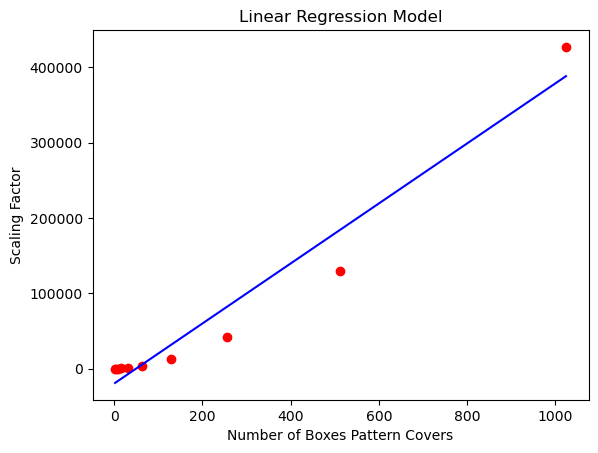

In [68]:
# Printing Linear Regression

plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x), color="blue")
plt.title("Linear Regression Model")
plt.xlabel('Number of Boxes Pattern Covers')
plt.ylabel('Scaling Factor')

Up above we fitted a linear regression. What we need to do is to put the x and y values through a Power Regression. A Power Regression is a Linear Regression that is transformed by applying log() to both sides, and then by applying exp() to the intercept after.

In [69]:
# Log transformation

ln_x = np.log(x)
ln_y = np.log(y)
print(ln_x)
print(ln_y)

[[0.69314718]
 [1.38629436]
 [2.07944154]
 [2.77258872]
 [3.4657359 ]
 [4.15888308]
 [4.85203026]
 [5.54517744]
 [6.23832463]
 [6.93147181]]
[[ 1.38629436]
 [ 2.77258872]
 [ 4.15888308]
 [ 5.54517744]
 [ 6.93049477]
 [ 8.27435701]
 [ 9.50680873]
 [10.64901369]
 [11.77502816]
 [12.96459315]]


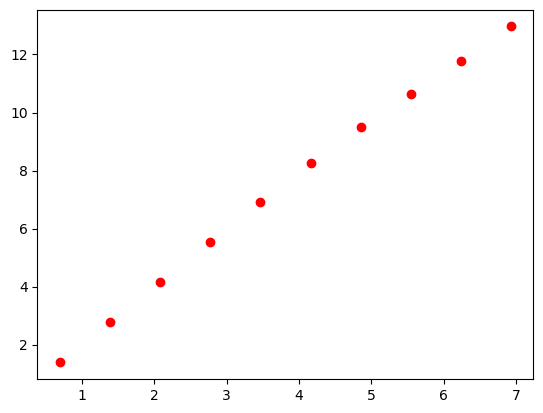

In [70]:
# Shows that it is a linear regression (before the reverse transformation)
plt.scatter(ln_x, ln_y, color='red')
plt.show()

In [71]:
# Fit a line to the linear regression

lin_reg_2 = LinearRegression()
lin_reg_2.fit(ln_x, ln_y)

LinearRegression()

In [72]:
# Preprocess and transform the intercept and coefficient

a = np.exp(lin_reg_2.intercept_)
a = a[0]
b = lin_reg_2.coef_
b = b[0][0]

In [73]:
# Print the intercept and the coefficient

print(f'a: {a}')
print(f'b: {b}')
print(f'Equation: {a} x^{b}')

a: 1.3493433964680381
b: 1.861524050778598
Equation: 1.3493433964680381 x^1.861524050778598


In [74]:
# Graph helper function

def graph(formula, x_range, p_x, p_y):
    plt.scatter(p_x, p_y, color='red')
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

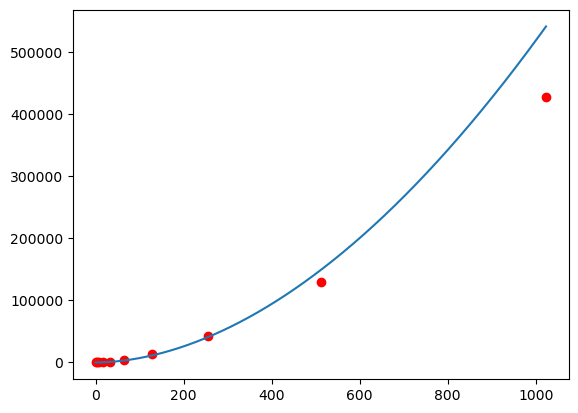

In [75]:
# Graph the fitted curve with the data

graph(f'{a}*(x**{b})', range(0, 1024), x, y)

## Get more data points to better fit the function

In [76]:

# Initialize array

sArr_2 = np.array([])
nArr_2 = np.array([])

scalingFactor = 1
count = 1

while (scalingFactor < 1024):
  print(f'Iteration {count}')
  boxSize = 1024//scalingFactor
  n = 0;

  # iterate through each box
  for row in range(scalingFactor):
    for col in range(scalingFactor):
      # iterate through each pixel in a box
      found = False 
      for x in range(row*boxSize, (row+1)*boxSize):
        for y in range(col*boxSize, (col+1)*boxSize):
          if fin_thresh[x][y] == 0:
            found = True
            n += 1
            break
        if found:
          break
  sArr_2 = np.append(sArr_2, scalingFactor)
  nArr_2 = np.append(nArr_2, n)
  scalingFactor += 10
  count += 1

# Prints values of scaling factor and n
print(sArr_2)
print(nArr_2)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [79]:
# Fitting Linear Regression
lin_reg_3 = LinearRegression()
x_2 = sArr_2.reshape(-1, 1)
y_2 = nArr_2.reshape(-1, 1)

# Log transformation
ln_x_2 = np.log(x_2)
ln_y_2 = np.log(y_2)

lin_reg_3.fit(ln_x_2, ln_y_2)

LinearRegression()

In [82]:
# Preprocess and transform the intercept and coefficient
a_2 = np.exp(lin_reg_3.intercept_)
a_2 = a_2[0]
b_2 = lin_reg_3.coef_
b_2 = b_2[0][0]

# Print the intercept and the coefficient
print(f'a: {a_2}')
print(f'b: {b_2}')
print(f'Equation: {a_2} x^{b_2}')

a: 2.2586133542952296
b: 1.7480835162476362
Equation: 2.2586133542952296 x^1.7480835162476362


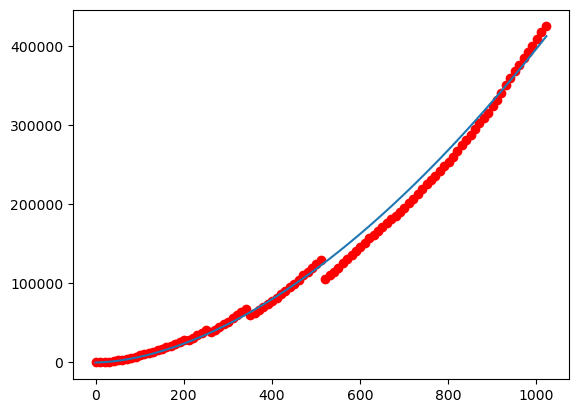

In [84]:
graph(f'{a_2}*(x**{b_2})', range(0, 1024), x_2, y_2)